# Titanic dataset

This notebook will guide you through a series of tasks to help you become familiar with pandas, numpy, and matplotlib using the Titanic dataset.

Fields in the Titanic dataset:
- PassengerId: An unique index for passenger rows. It starts from 1 for first row and increments by 1 for every new rows.
- Survived: Shows if the passenger survived or not. 1 stands for survived and 0 stands for not survived.
- Pclass: Ticket class. 1 stands for First class ticket. 2 stands for Second class ticket. 3 stands for Third class ticket.
- Name: Passenger's name.
- Sex: Passenger's gender.
- Age: Passenger's age.
- SibSp: Number of siblings or spouses travelling with each passenger.
- Parch: Number of parents of children travelling with each passenger.
- Ticket: Ticket number.
- Fare: How much money the passenger has paid for the travel journey.
- Cabin: Cabin number of the passenger.
- Embarked: Port from where the particular passenger was embarked/boarded.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Task 1: Load the data
Read the CSV file into a pandas DataFrame.

In [2]:
original_data=pd.read_csv("titanic.csv")
df=original_data.copy()

## Task 2: Display basic information
Use `.info()` to display concise summary information about the DataFrame.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Task 3: Descriptive statistics
Generate descriptive statistics for the dataset using `.describe()`.

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Task 4: Missing values
Identify columns with missing values and count the number of missing values in each column.

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Task 5: Fill missing values
Fill missing values in all columns with the mean of the respective column.

In [6]:
nulls=df.isnull().sum()
for c in df.columns:
    if nulls[c]>0:
        if pd.api.types.is_numeric_dtype(df[c]):
            #replace with mean for numeric columns
            df[c]=df[c].fillna(df[c].mean())
        else:
            #replace with mode for non-numeric columns
            df[c]=df[c].fillna(df[c].mode()[0])
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## Task 6: Drop columns
Remove the `Name` from the DataFrame because it is not relevant for our analysis.

In [7]:
df.drop("Name",axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,B96 B98,S


## Task 7: Filter rows
Filter and display rows where the passengers are female and survived.

In [8]:
df[(df["Sex"]=="female") & (df["Survived"]==1)]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,female,27.0,0,2,347742,11.1333,B96 B98,S
9,10,1,2,female,14.0,1,0,237736,30.0708,B96 B98,C
...,...,...,...,...,...,...,...,...,...,...,...
874,875,1,2,female,28.0,1,0,P/PP 3381,24.0000,B96 B98,C
875,876,1,3,female,15.0,0,0,2667,7.2250,B96 B98,C
879,880,1,1,female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,female,25.0,0,1,230433,26.0000,B96 B98,S


## Task 8: New column
Create a new column `FamilySize` that adds `SibSp` and `Parch` columns.

In [9]:
df["FamilySize"]=df["SibSp"]+df["Parch"]
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,male,35.0,0,0,373450,8.0500,B96 B98,S,0


## Task 9: Sorting
Sort the dataset by `Fare` in descending order.

In [10]:
df.sort_values("Fare",ascending=False,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
679,680,1,1,male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,1
258,259,1,1,female,35.0,0,0,PC 17755,512.3292,B96 B98,C,0
737,738,1,1,male,35.0,0,0,PC 17755,512.3292,B101,C,0
88,89,1,1,female,23.0,3,2,19950,263.0000,C23 C25 C27,S,5
438,439,0,1,male,64.0,1,4,19950,263.0000,C23 C25 C27,S,5


## Task 10: Histogram
Plot a histogram of the `Age` column using matplotlib.

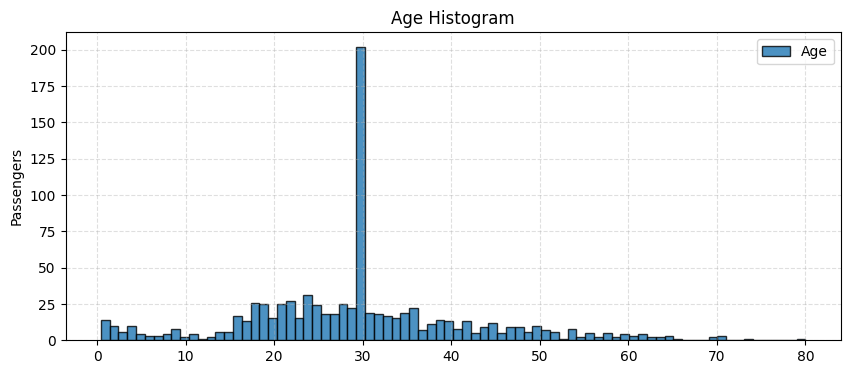

In [11]:
ax=df["Age"].plot(kind="hist",title="Age Histogram",bins=80,edgecolor="black",figsize=(10,4),alpha=0.8)
ax.grid(True,linestyle="--",alpha=0.4)
ax.set_ylabel("Passengers")
ax.legend()
plt.show()

## Task 11: Bar chart
Plot a bar chart showing the number of survivors and non-survivors.

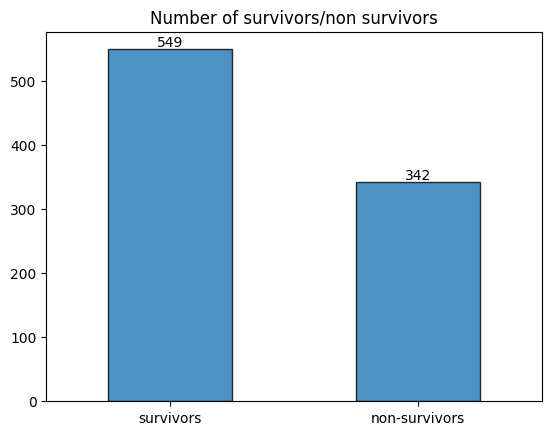

In [12]:
ax=df["Survived"].value_counts().rename({0:"survivors",1:"non-survivors"}).plot(
    kind="bar",title="Number of survivors/non survivors",edgecolor="black",alpha=0.8,rot=0)
ax.bar_label(ax.containers[0],fmt="%d")
ax.set_xlabel("")
plt.show()

## Task 12: Scatter plot
Create a scatter plot of `Age` vs `Fare` colored by `Survived`.

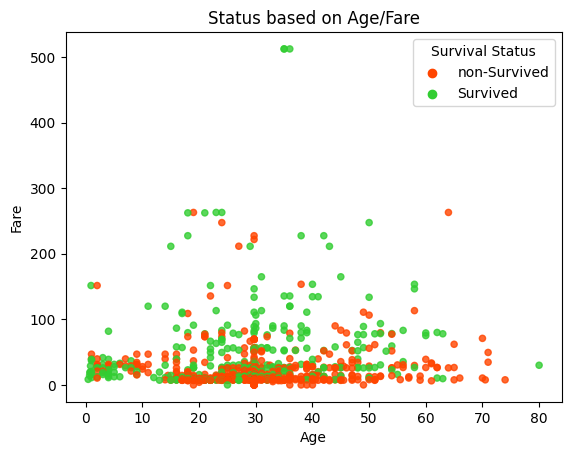

In [13]:
df["Survived_color"]=df["Survived"].map({0:"orangered",1:"limegreen"}) #map survived status to colors
ax=df.plot(kind="scatter",x="Age",y="Fare",c="Survived_color",title="Status based on Age/Fare",alpha=0.8)
ax.scatter([],[],color='orangered',label='non-Survived') #information for legend
ax.scatter([],[],color='limegreen',label='Survived')
ax.legend(title='Survival Status')
plt.show()
df.drop("Survived_color",axis=1,inplace=True)

## Task 13: Mapping
Map all the alphabetical values in respective columns to numeric values.

In [14]:
#can't map Ticket & Cabin
df["Sex"]=df["Sex"].map({"male":0,"female":1})
df["Embarked"]=df["Embarked"].map({"S":0,"C":1,"Q":2})
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
679,680,1,1,0,36.0,0,1,PC 17755,512.3292,B51 B53 B55,1,1
258,259,1,1,1,35.0,0,0,PC 17755,512.3292,B96 B98,1,0
737,738,1,1,0,35.0,0,0,PC 17755,512.3292,B101,1,0
88,89,1,1,1,23.0,3,2,19950,263.0000,C23 C25 C27,0,5
438,439,0,1,0,64.0,1,4,19950,263.0000,C23 C25 C27,0,5


## Task 14: Correlation
Calculate and display the correlation matrix for the numerical features. (You can use `sns.heatmap()` to plot the correlation matrix.)

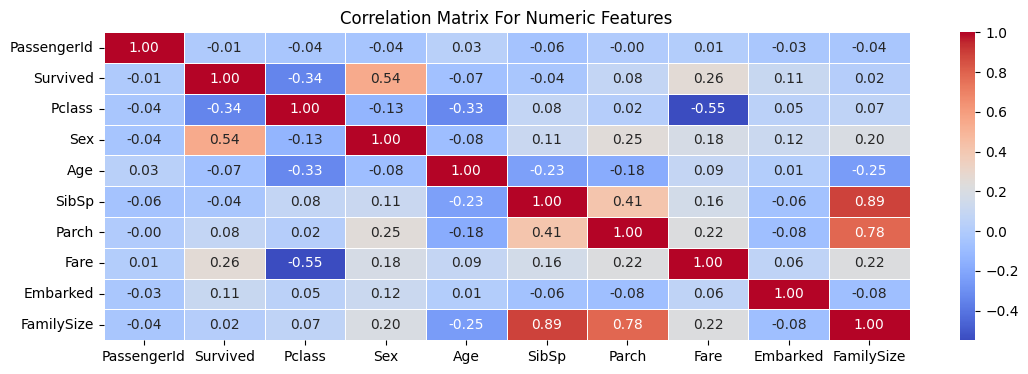

In [15]:
df_numeric=df.copy().drop(["Ticket","Cabin"],axis=1)
corr=df_numeric.corr()
plt.figure(figsize=(13,4))
plt.title("Correlation Matrix For Numeric Features")
sns.heatmap(corr,annot=True,fmt=".2f",cmap="coolwarm",linewidths=0.5)
plt.xticks(rotation=0)
plt.show()

## Task 15: Normalize data
Normalize all features in the dataset. You can use either Min-Max scaling or mean-std normalization.

In [16]:
print("Dataset Before Normalization:")
display(df_numeric.agg(["mean","std","min","max"])) #same as describe
df_normal_minmax=df_numeric.copy()
df_normal_minmax=(df_normal_minmax-df_normal_minmax.min())/(df_normal_minmax.max()-df_normal_minmax.min()) #(data-min)/(max-min)
print("After Min-Max Normalization:")
display(df_normal_minmax.agg(["mean","std","min","max"]))
df_normal_meanstd=df_numeric.copy()
df_normal_meanstd=(df_normal_meanstd-df_normal_meanstd.mean())/df_normal_meanstd.std() #(data-mean)/std
print("After Mean-Std Normalization:")
display(df_normal_meanstd.agg(["mean","std","min","max"]))

Dataset Before Normalization:


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.361392,0.904602
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.635673,1.613459
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,10.000000


After Min-Max Normalization:


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
mean,0.500000,0.383838,0.654321,0.352413,0.367921,0.065376,0.063599,0.062858,0.180696,0.090460
std,0.289162,0.486592,0.418036,0.477990,0.163383,0.137843,0.134343,0.096995,0.317837,0.161346
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


After Mean-Std Normalization:


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
mean,9.968332e-18,0.000000,3.189866e-17,0.000000,2.272780e-16,9.569599e-17,0.000000,-3.189866e-17,1.196200e-17,6.379733e-17
std,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.729137e+00,-0.788829,-1.565228e+00,-0.737281,-2.251891e+00,-4.742788e-01,-0.473408,-6.480577e-01,-5.685178e-01,-5.606599e-01
max,1.729137e+00,1.266279,8.269128e-01,1.354813,3.868699e+00,6.780355e+00,6.970233,9.661740e+00,2.577752e+00,5.637206e+00


## Task 16: Survival rate by age group
Create age groups (bins) and calculate the survival rate for each group.

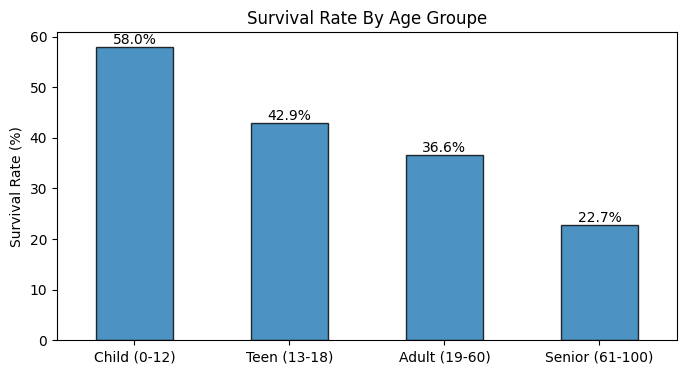

In [17]:
bin_edges=[0,12,18,60,100]#age groups
bin_labels=["Child (0-12)","Teen (13-18)","Adult (19-60)","Senior (61-100)"] #label of age groups
df["Age_Group"]=pd.cut(df["Age"],bins=bin_edges,labels=bin_labels) #add lables to dataset
df_survival_rate=df.groupby("Age_Group",observed=False)["Survived"].mean()*100 #calculate survival rate into new df
plt.figure(figsize=(8,4))
ax=df_survival_rate.plot(kind="bar",rot=0,edgecolor="black",alpha=0.8)
ax.set_title("Survival Rate By Age Groupe")
ax.set_xlabel("")
ax.set_ylabel("Survival Rate (%)")
ax.bar_label(ax.containers[0],fmt="%.1f%%")
plt.show()
df.drop("Age_Group",axis=1,inplace=True)